<a href="https://colab.research.google.com/github/projet-ML/COVID/blob/master/statistiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt



In [76]:
data = pd.read_csv(r'https://raw.githubusercontent.com/projet-ML/COVID/master/data/totalconfirmed_covid19_100620.csv')
print(len(data))
data.head()

101


,Date,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
0,2/3/2020,1,0,0,28.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/3/2020,0,0,0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4/3/2020,2,0,0,34.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5/3/2020,0,0,0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/3/2020,0,0,0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On représente la situation au Maroc du 2/3/2020 au 10/06/2020

In [77]:
print(len(range(1, len(data)+1)))

101


Représentation de l'évolution de l'épidémie au Maroc depuis le 2/3/2020


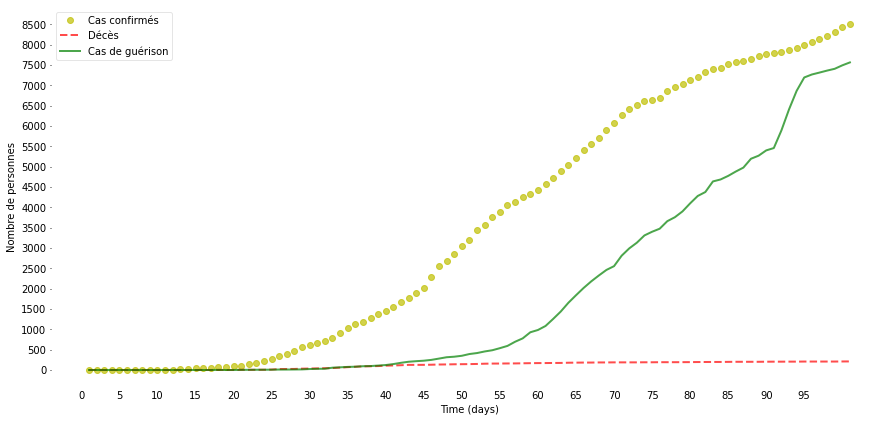

In [78]:
# representation de l'évolution globale de l'épidémie au Maroc (nombre total de cas)
t = range(1, len(data)+1)
f, ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(t, data['Confirmed'], 'yo', alpha=0.7, linewidth=2, label='Cas confirmés')
ax.plot(t, data['Deaths'], 'r--', alpha=0.7, linewidth=2, label='Décès')
ax.plot(t, data['Recovered'], 'g-', alpha=0.7, linewidth=2, label='Cas de guérison')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Nombre de personnes')
ax.yaxis.set_tick_params(length=1)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
  ax.spines[spine].set_visible(False)
print("Représentation de l'évolution de l'épidémie au Maroc depuis le 2/3/2020")
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0, 9000, 500))
plt.show();

Nombre de cas confirmés et de décès journaliers au Maroc

In [79]:
data = pd.read_csv(r'https://raw.githubusercontent.com/projet-ML/COVID/master/data/daily-covid-cases-deaths.csv')
print(len(data))
data.head()

26100


,Entity,Code,Date,Cases,Deaths
0,Afghanistan,AFG,31-Dec-19,0,0
1,Afghanistan,AFG,1-Jan-20,0,0
2,Afghanistan,AFG,2-Jan-20,0,0
3,Afghanistan,AFG,3-Jan-20,0,0
4,Afghanistan,AFG,4-Jan-20,0,0


In [80]:
data_morocco = data.query('Entity=="Morocco" and Cases > 0 ').copy()
data_morocco.head()

,Entity,Code,Date,Cases,Deaths
16018,Morocco,MAR,3-Mar-20,1,0
16019,Morocco,MAR,6-Mar-20,1,0
16020,Morocco,MAR,12-Mar-20,3,1
16021,Morocco,MAR,13-Mar-20,1,0
16022,Morocco,MAR,14-Mar-20,1,0


Représentation du nombre de cas confirmés et de décès journaliers


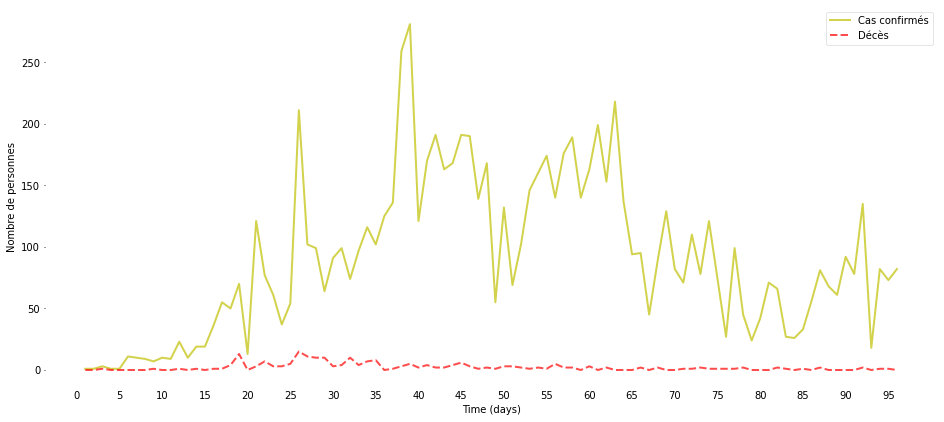

In [81]:
cases = data_morocco['Cases']
deaths = data_morocco['Deaths']
dates = data_morocco['Date']
# Représentation du nombre de cas confirmés et de décès journaliers
t = range(1, len(data_morocco)+1)
f, ax = plt.subplots(1,1,figsize=(16,7))
ax.plot(t, cases, 'y-', alpha=0.7, linewidth=2, label='Cas confirmés')
ax.plot(t, deaths, 'r--', alpha=0.7, linewidth=2, label='Décès')
"""ax.plot(t, data['Recovered'], 'g-', alpha=0.7, linewidth=2, label='Cas de guérison')"""
ax.set_xlabel('Time (days)')
ax.set_ylabel('Nombre de personnes')
ax.yaxis.set_tick_params(length=1)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.xticks(np.arange(0, 100, 5))
for spine in ('top', 'right', 'bottom', 'left'):
  ax.spines[spine].set_visible(False)
print("Représentation du nombre de cas confirmés et de décès journaliers")
plt.show();

On compare le total de nombre de cas confirmés au Maroc avec celui d'autres pays

In [82]:
data = pd.read_csv(r'https://raw.githubusercontent.com/projet-ML/COVID/master/data/total-and-daily-cases-covid-19.csv')
print(len(data))
data.head()

20088


,Entity,Code,Date,TotalCases,DailyCases
0,Afghanistan,AFG,31-Dec-19,0.0,0.0
1,Afghanistan,AFG,1-Jan-20,0.0,0.0
2,Afghanistan,AFG,2-Jan-20,0.0,0.0
3,Afghanistan,AFG,3-Jan-20,0.0,0.0
4,Afghanistan,AFG,4-Jan-20,0.0,0.0


In [83]:
cases_morocco = data.query('Entity=="Morocco" and TotalCases > 0 ').copy()
cases_italy = data.query('Entity=="Italy" and TotalCases > 0 ').copy()
cases_france = data.query('Entity=="France" and TotalCases > 0 ').copy()
cases_algeria = data.query('Entity=="Algeria" and TotalCases > 0 ').copy()
print(len(cases_morocco))
print(len(cases_italy))
print(len(cases_china))
print(len(cases_algeria))

98
137
168
106


Représentation de la somme totale des cas confirmés


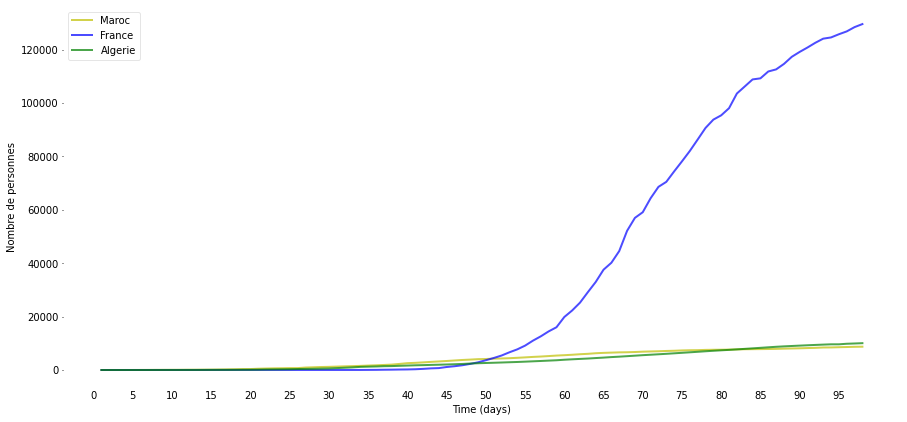

In [84]:
# Représentation de la somme totale des cas confirmés

t = range(1, len(cases_morocco)+1)
n = len(cases_morocco)
f, ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(t, cases_morocco["TotalCases"], 'y-', alpha=0.7, linewidth=2, label='Maroc')
"""ax.plot(t, cases_italy["TotalCases"][:n], 'r-', alpha=0.7, linewidth=2, label='Italy')"""
ax.plot(t, cases_france["TotalCases"][:n], 'b-', alpha=0.7, linewidth=2, label='France')
ax.plot(t, cases_algeria["TotalCases"][:n], 'g-', alpha=0.7, linewidth=2, label='Algerie')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Nombre de personnes')
ax.yaxis.set_tick_params(length=1)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.xticks(np.arange(0, 100, 5))
for spine in ('top', 'right', 'bottom', 'left'):
  ax.spines[spine].set_visible(False)
print("Représentation de la somme totale des cas confirmés")
plt.show();

In [85]:
data = pd.read_csv(r'https://raw.githubusercontent.com/projet-ML/COVID/master/data/total-deaths-covid-19.csv')
print(len(data))
data.head()

26325


,Entity,Code,Date,Deaths
0,Afghanistan,AFG,31-Dec-19,0
1,Afghanistan,AFG,1-Jan-20,0
2,Afghanistan,AFG,2-Jan-20,0
3,Afghanistan,AFG,3-Jan-20,0
4,Afghanistan,AFG,4-Jan-20,0


In [86]:
cases_morocco = data.query('Entity=="Morocco" and Deaths > 0 ').copy()
cases_italy = data.query('Entity=="Italy" and Deaths > 0 ').copy()
cases_france = data.query('Entity=="France" and Deaths > 0 ').copy()
print(len(cases_morocco))
print(len(cases_italy))
print(len(cases_china))

96
114
168


Représentation de la somme totale des décès


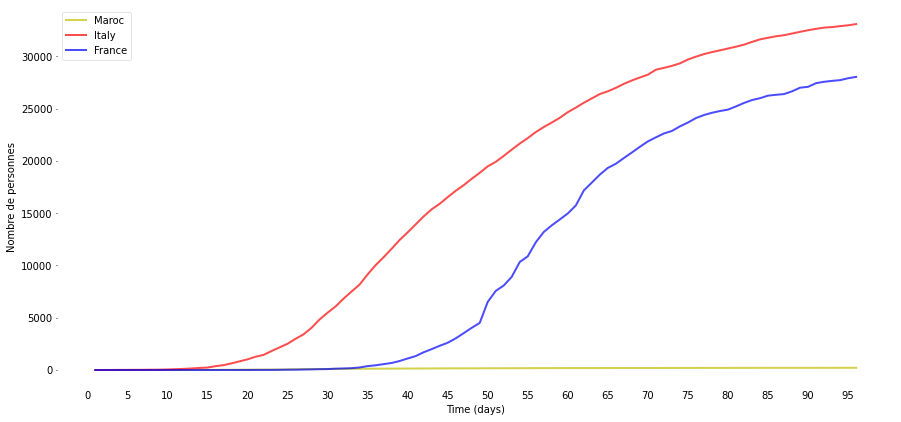

In [87]:
t = range(1, len(cases_morocco)+1)
n = len(cases_morocco)
f, ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(t, cases_morocco["Deaths"], 'y-', alpha=0.7, linewidth=2, label='Maroc')
ax.plot(t, cases_italy["Deaths"][:n], 'r-', alpha=0.7, linewidth=2, label='Italy')
ax.plot(t, cases_france["Deaths"][:n], 'b-', alpha=0.7, linewidth=2, label='France')
"""ax.plot(t, data['Recovered'], 'g-', alpha=0.7, linewidth=2, label='Cas de guérison')"""
ax.set_xlabel('Time (days)')
ax.set_ylabel('Nombre de personnes')
ax.yaxis.set_tick_params(length=1)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.xticks(np.arange(0, 100, 5))
for spine in ('top', 'right', 'bottom', 'left'):
  ax.spines[spine].set_visible(False)
print("Représentation de la somme totale des décès")
plt.show();